In [1]:
import wandb
import numpy as np
import pandas as pd
from collections import defaultdict

In [2]:
api = wandb.Api()
runs = api.runs("kilian/lift")

# Teacher Prior influence

In [2]:
# Filter runs by the "beta_sweep" tag
beta_sweep_runs = [run for run in runs if "beta_sweep" in run.tags and run.state == "finished"]

# Output the filtered runs
print(f"Found {len(beta_sweep_runs)} runs with the tag 'beta_sweep'.")

Found 60 runs with the tag 'beta_sweep'.


In [3]:
run_data = defaultdict(list)

for run in beta_sweep_runs:
    run_id = run.id
    history = run.history(samples=10000)
    beta = run.config["encoder"]["beta_2"]
    run_data[beta].append(history.encoder_reward.values[-1])

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


betas = list(run_data.keys())
rwd_mean = [np.mean(val) for val in run_data.values()]
rwd_std = [np.std(val) for val in run_data.values()]
data = pd.DataFrame({
    'Scaling Factor': betas,
    'Mean Reward': rwd_mean,
    'Standard Deviation': rwd_std
})

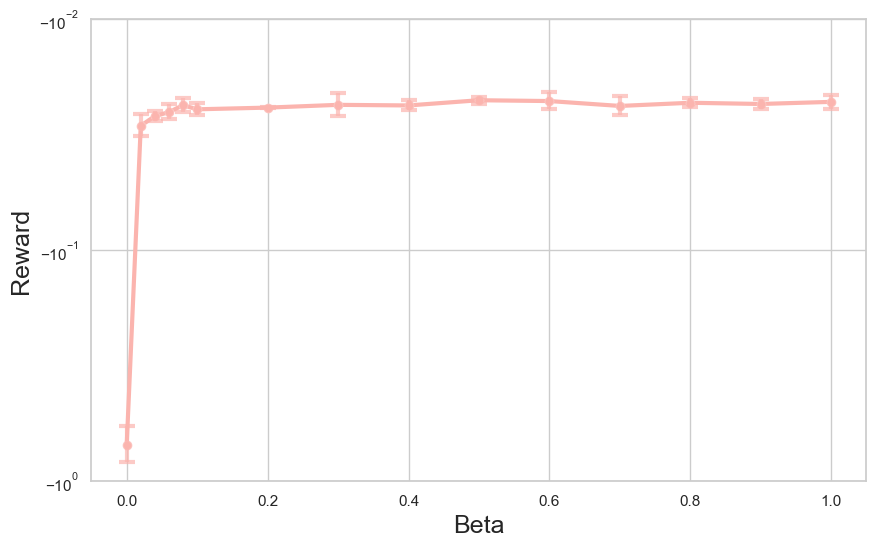

In [13]:
cmap = plt.get_cmap('Pastel1')
# set fontsize
plt.rc('font', size=16)

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

ax = sns.lineplot(x='Scaling Factor', y='Mean Reward', data=data, marker='o', errorbar=None, color=cmap(0), linewidth=3)
ax.errorbar(data['Scaling Factor'], data['Mean Reward'], yerr=data['Standard Deviation'], fmt='o', ecolor=cmap(0), elinewidth=3, capthick=3, capsize=6, alpha=0.7, color=cmap(0))

ax.set_yscale('symlog', linthresh=0.01)

plt.ylim(-1., -0.01)
plt.xlabel('Beta', fontsize=18)
plt.ylabel('Reward', fontsize=18)
plt.savefig('../figures/teacher_beta.png', dpi=400)
plt.show()

# MI Iter

In [3]:
# Filter runs by the "beta_sweep" tag
beta_sweep_runs = [run for run in runs if "mi_sweep" in run.tags and run.state == "finished"]

# Output the filtered runs
print(f"Found {len(beta_sweep_runs)} runs with the tag 'mi_sweep'.")

Found 25 runs with the tag 'mi_sweep'.


In [4]:
run_data = defaultdict(list)

for run in beta_sweep_runs:
    run_id = run.id
    history = run.history(samples=10000)
    run_results = {
        "noise": run.config["noise_range"][-1],
        "noise_slope": run.config["noise_slope_range"][-1],
        "alpha": run.config["alpha_range"][-1],
        "mean_rewards": np.nanmean(history.encoder_reward.values[1:]),
        "mean_mae": np.nanmean(history.encoder_mae.values[1:]),
    }
    for key, value in run_results.items():
        run_data[key].append(value)

df = pd.DataFrame(run_data)

In [5]:
df.head()

,noise,noise_slope,alpha,mean_rewards,mean_mae
0,1.00000,1.00000,2.5,-0.141975,0.595875
1,1.00000,1.00000,3.0,-0.123636,0.603506
2,0.75025,0.75025,3.0,-0.034769,0.373157
3,0.50050,0.50050,3.0,-0.038020,0.429722
4,0.25075,0.25075,3.0,-0.041322,0.436695


Text(0.5, 1.0, 'Mean MAE')

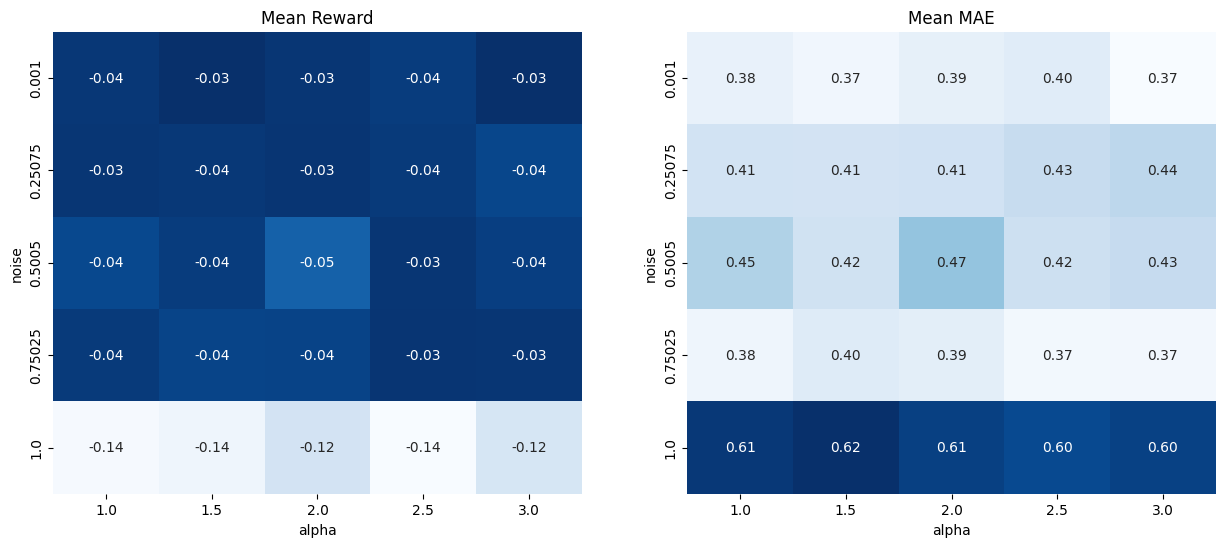

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(1, 2, figsize=(15, 6))

sns.heatmap(df.pivot(index='noise', columns='alpha', values='mean_rewards'), annot=True, cbar=False, fmt=".2f", cmap="Blues", ax=axs[0])
sns.heatmap(df.pivot(index='noise', columns='alpha', values='mean_mae'), annot=True, cbar=False, fmt=".2f", cmap="Blues", ax=axs[1])

axs[0].set_title("Mean Reward")
axs[1].set_title("Mean MAE")